In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!unzip /content/2019-2nd-ml-month-with-kakr.zip

Archive:  /content/2019-2nd-ml-month-with-kakr.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [3]:
df=pd.read_csv('/content/train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15035 entries, 0 to 15034
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             15035 non-null  int64  
 1   date           15035 non-null  object 
 2   price          15035 non-null  float64
 3   bedrooms       15035 non-null  int64  
 4   bathrooms      15035 non-null  float64
 5   sqft_living    15035 non-null  int64  
 6   sqft_lot       15035 non-null  int64  
 7   floors         15035 non-null  float64
 8   waterfront     15035 non-null  int64  
 9   view           15035 non-null  int64  
 10  condition      15035 non-null  int64  
 11  grade          15035 non-null  int64  
 12  sqft_above     15035 non-null  int64  
 13  sqft_basement  15035 non-null  int64  
 14  yr_built       15035 non-null  int64  
 15  yr_renovated   15035 non-null  int64  
 16  zipcode        15035 non-null  int64  
 17  lat            15035 non-null  float64
 18  long  

In [4]:
df.isnull().sum()

,0
id,0
date,0
price,0
bedrooms,0
bathrooms,0
sqft_living,0
sqft_lot,0
floors,0
waterfront,0
view,0


In [5]:
df['date']

,date
0,20141013T000000
1,20150225T000000
2,20150218T000000
3,20140627T000000
4,20150115T000000
...,...
15030,20141014T000000
15031,20150326T000000
15032,20140521T000000
15033,20150223T000000


In [6]:
df['datetime']=pd.to_datetime(df['date'])


In [7]:
df['datetime']

,datetime
0,2014-10-13
1,2015-02-25
2,2015-02-18
3,2014-06-27
4,2015-01-15
...,...
15030,2014-10-14
15031,2015-03-26
15032,2014-05-21
15033,2015-02-23


In [8]:
df['year']=df['datetime'].dt.year
df['month']=df['datetime'].dt.month
df['day']=df['datetime'].dt.day

<Axes: xlabel='price', ylabel='Count'>

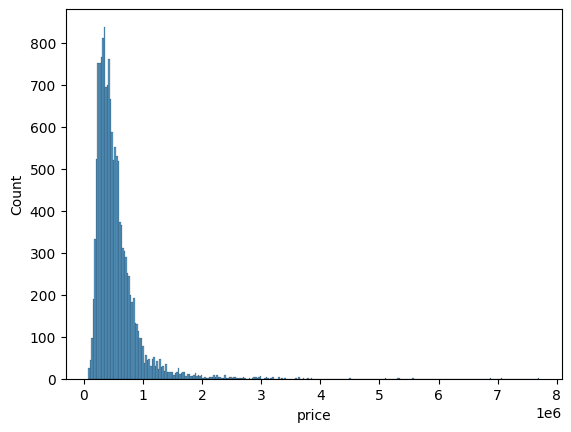

In [9]:
sns.histplot(df['price'])

In [10]:
df['Price_log'] = np.log1p(df['price'])

<Axes: xlabel='Price_log', ylabel='Count'>

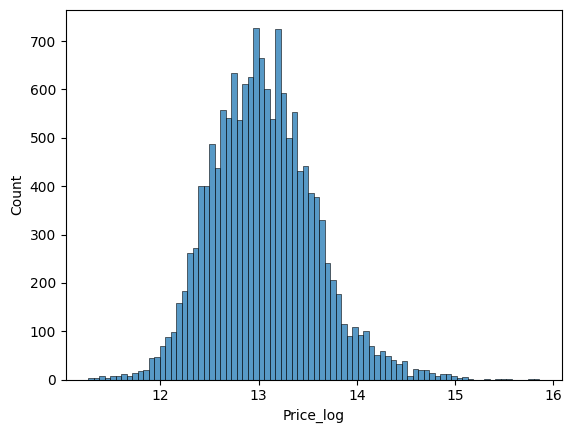

In [11]:
sns.histplot(df['Price_log'])

In [12]:
df.drop(['datetime','date'],axis=1,inplace=True)

<Axes: >

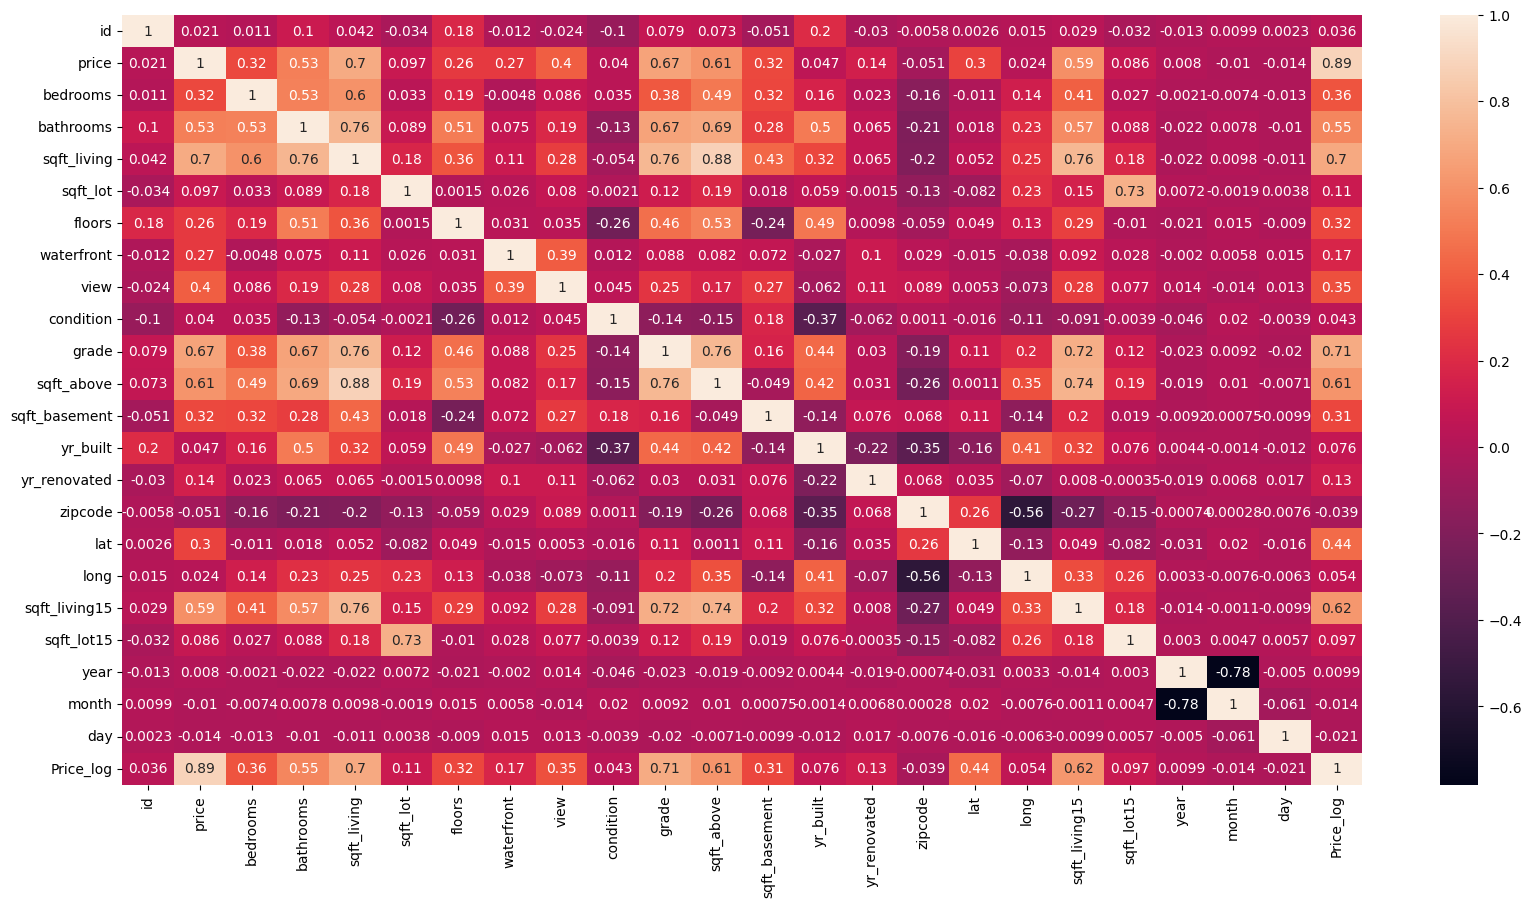

In [13]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True)

In [14]:
num_columns=df.select_dtypes(include=['int64','float64']).columns.tolist()

In [15]:
num_columns.remove('price')
num_columns.remove('Price_log')
num_columns.remove('id')

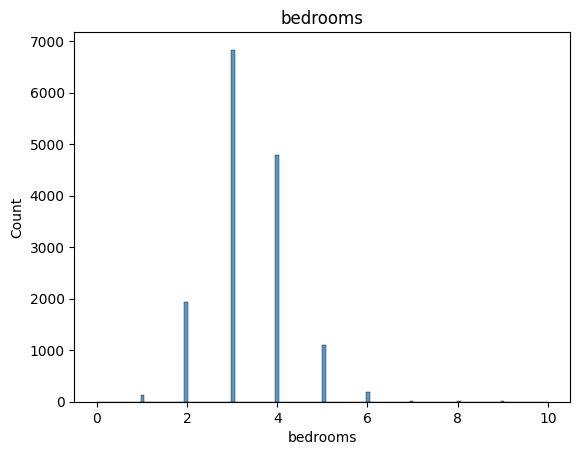

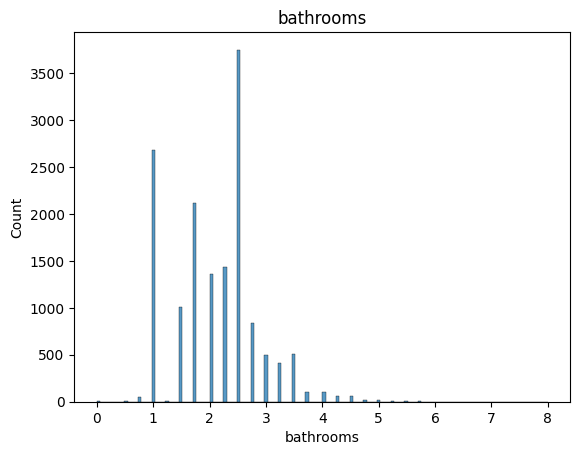

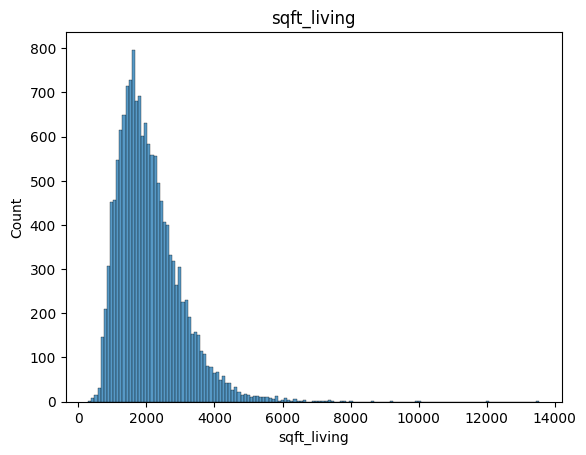

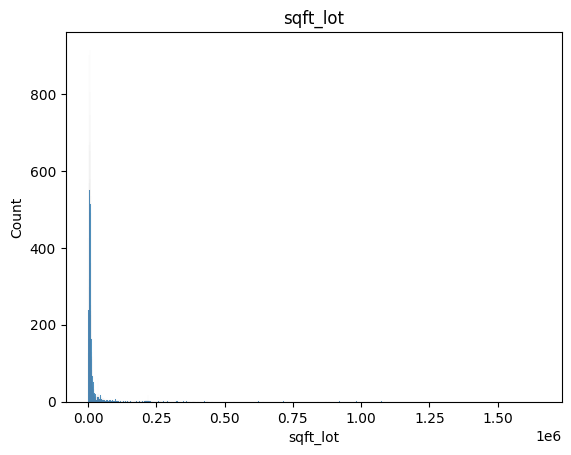

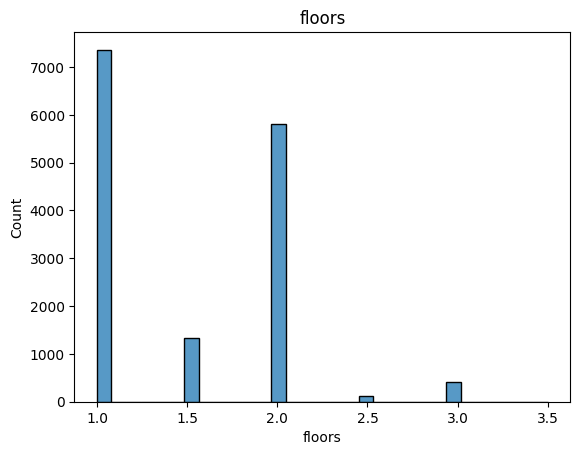

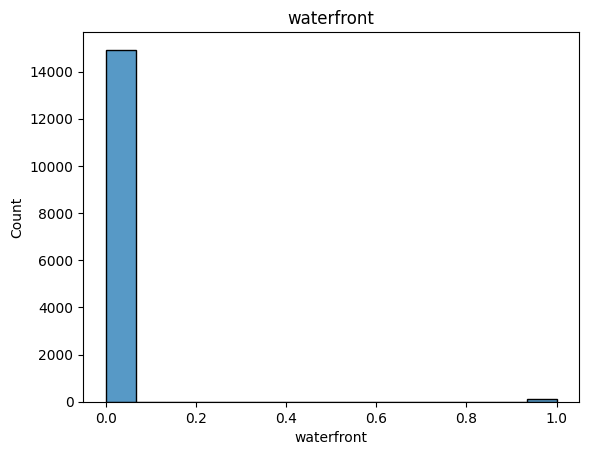

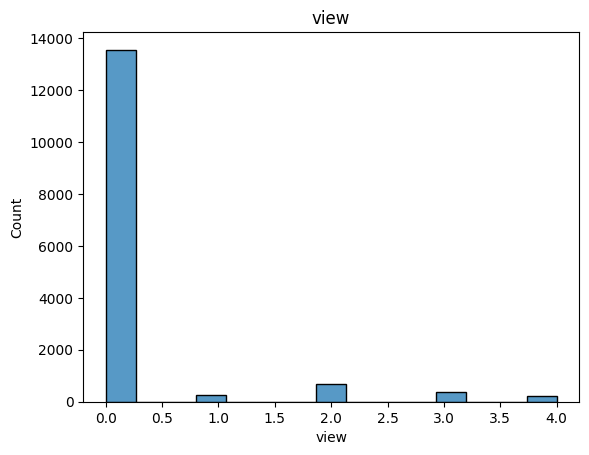

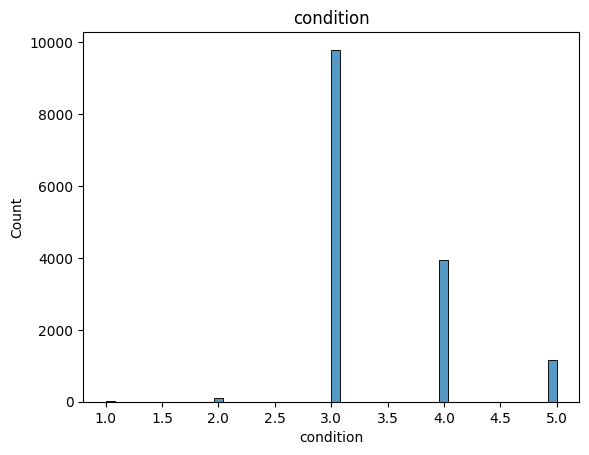

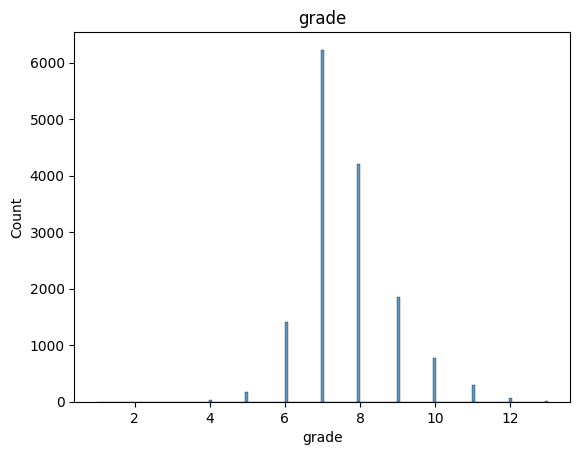

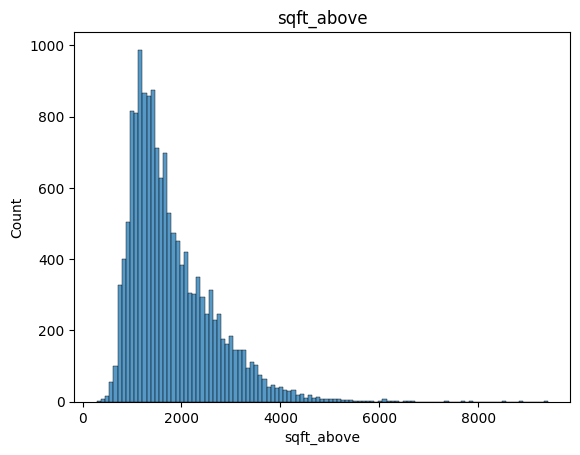

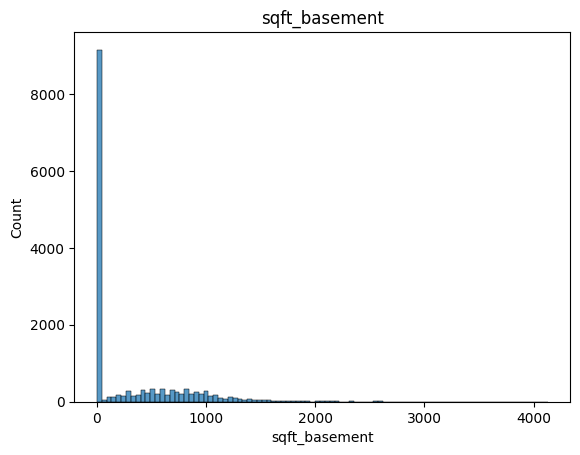

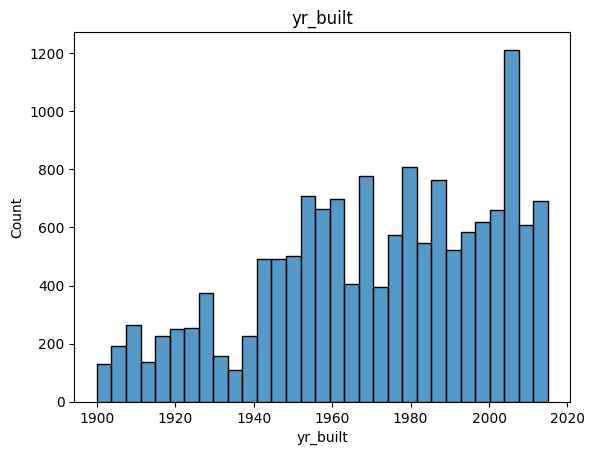

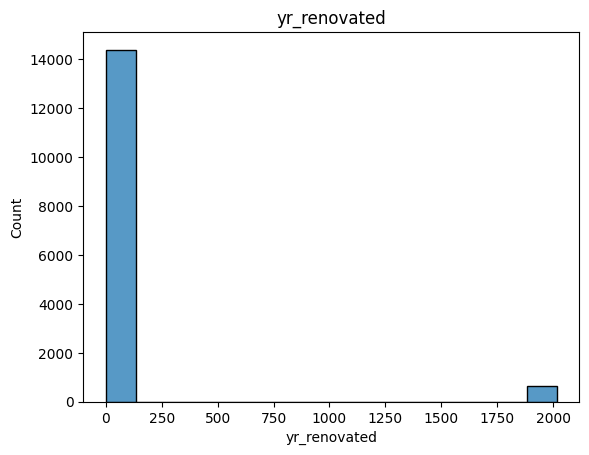

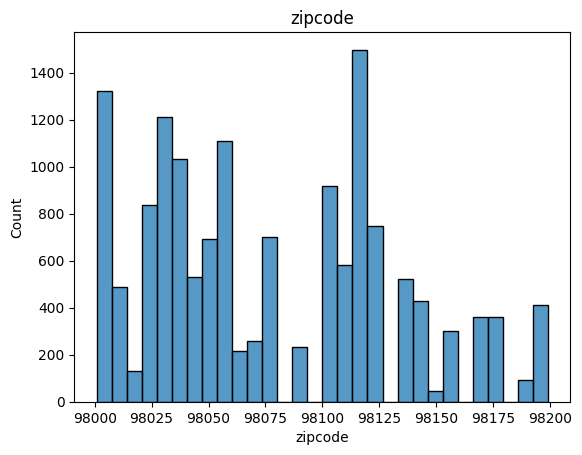

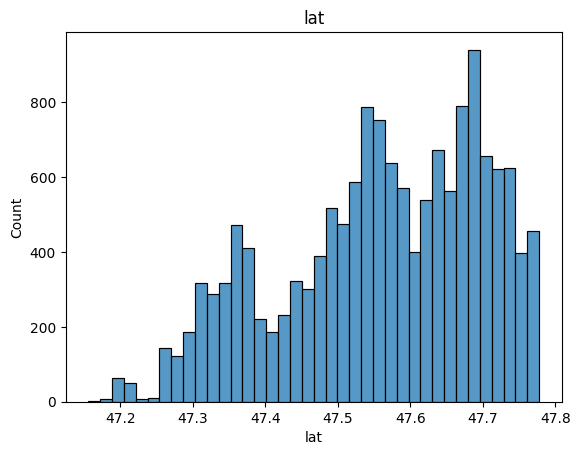

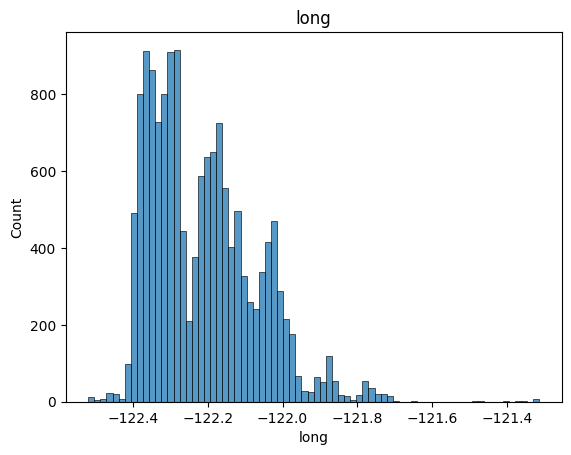

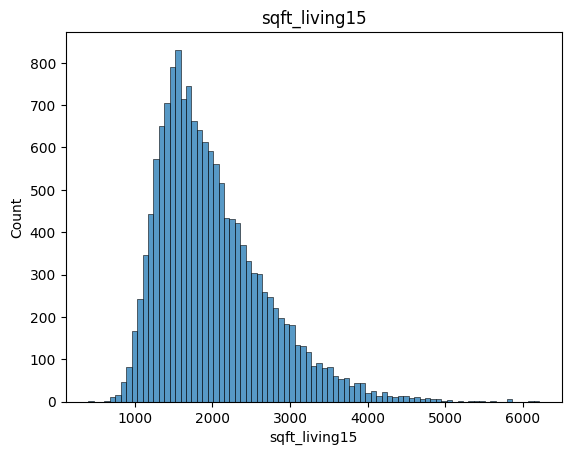

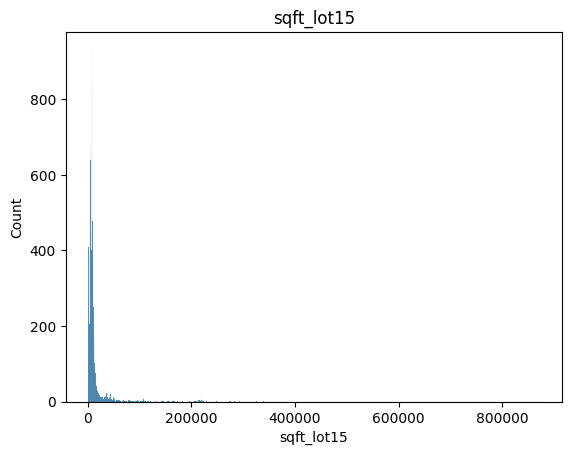

In [16]:
for i in num_columns:
  sns.histplot(df[i])
  plt.title(i)
  plt.show()

In [17]:
df['sqft_living'] = np.log1p(df['sqft_living'])
df['sqft_above']  = np.log1p(df['sqft_above'])
df['sqft_basement'] = np.log1p(df['sqft_basement'])
df['sqft_living15'] = np.log1p(df['sqft_living15'])
df['sqft_lot15']    = np.log1p(df['sqft_lot15'])


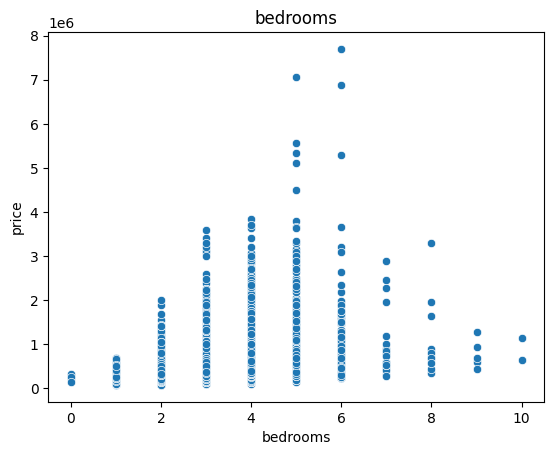

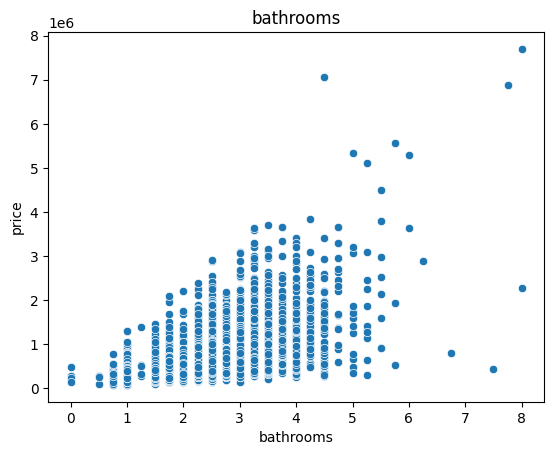

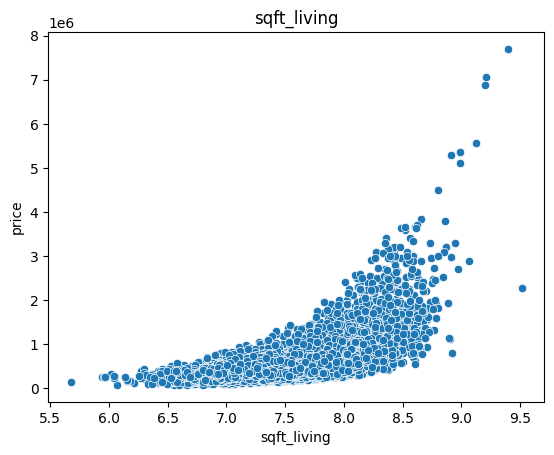

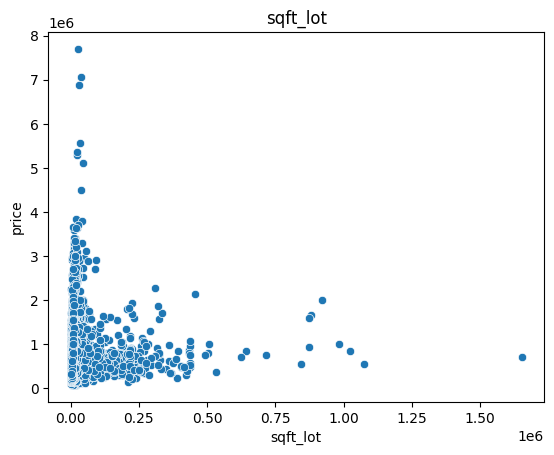

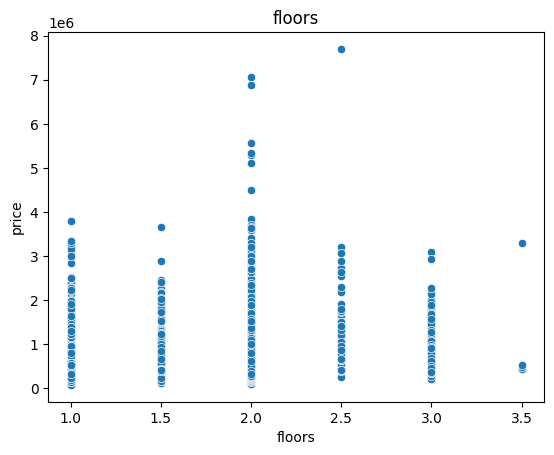

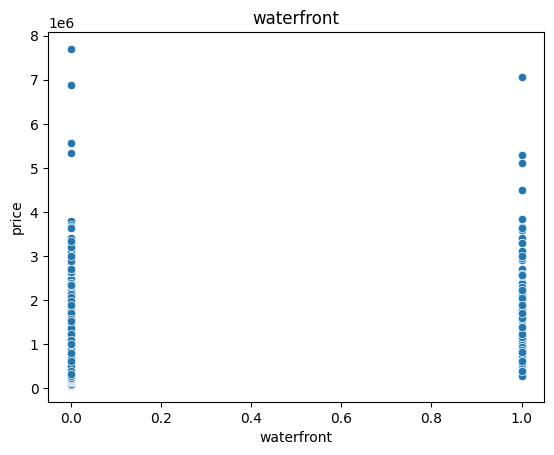

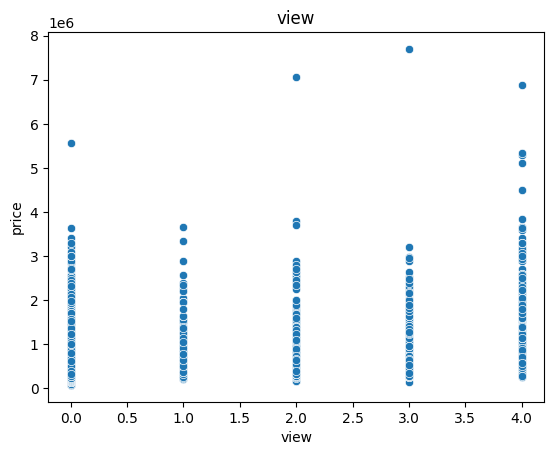

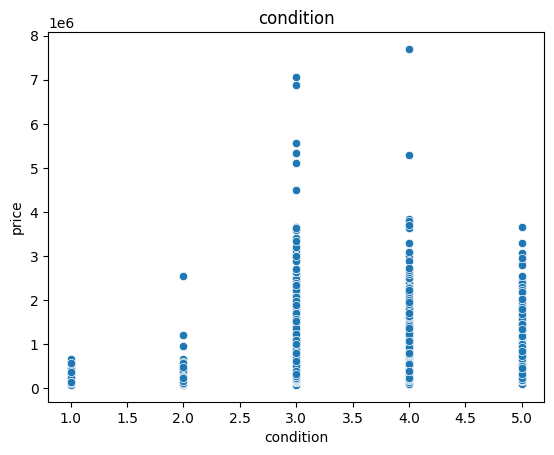

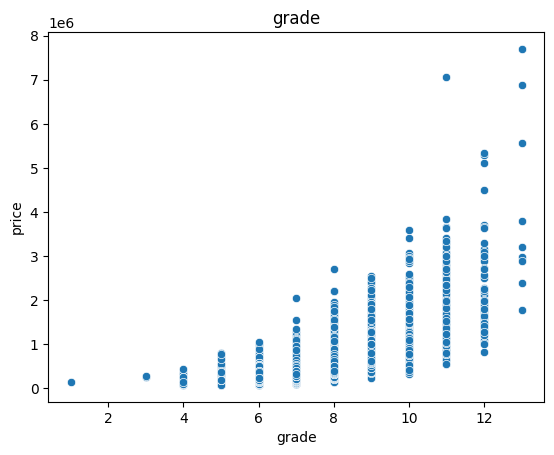

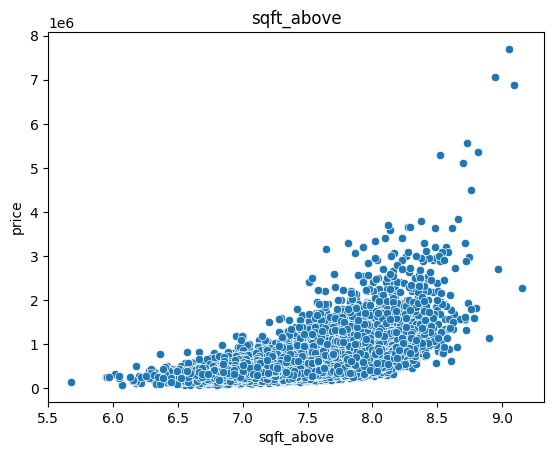

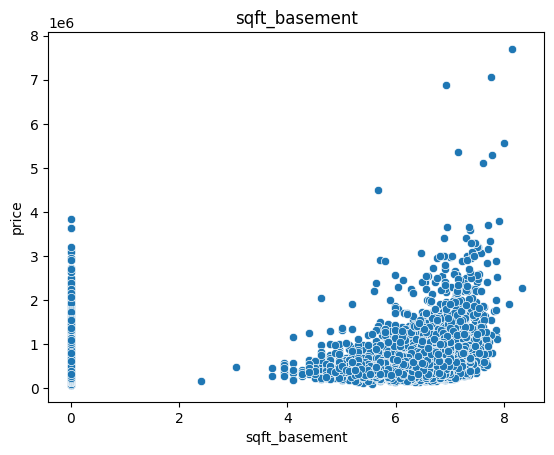

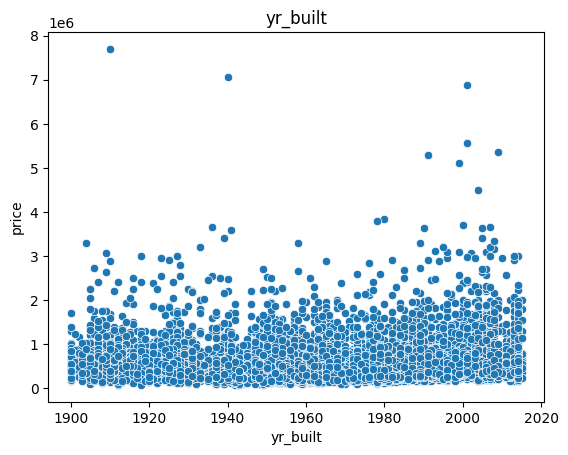

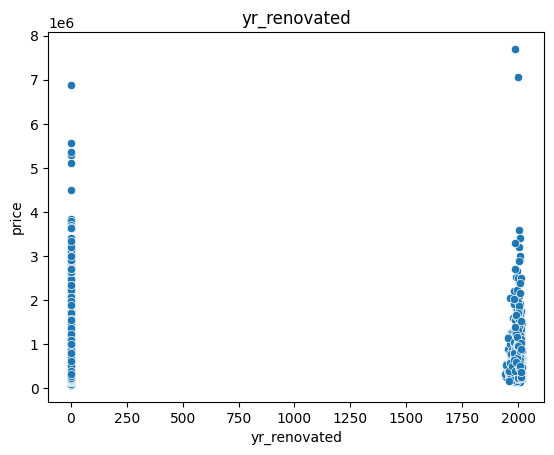

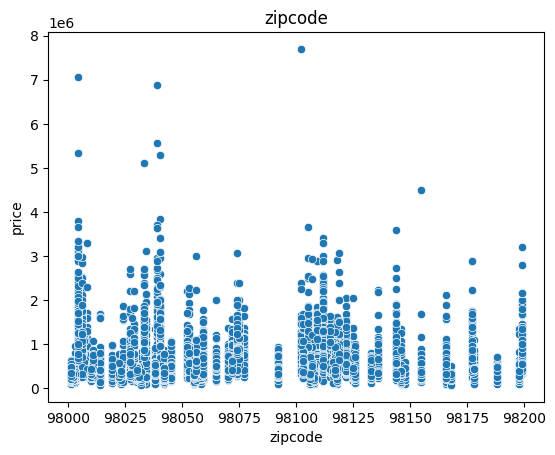

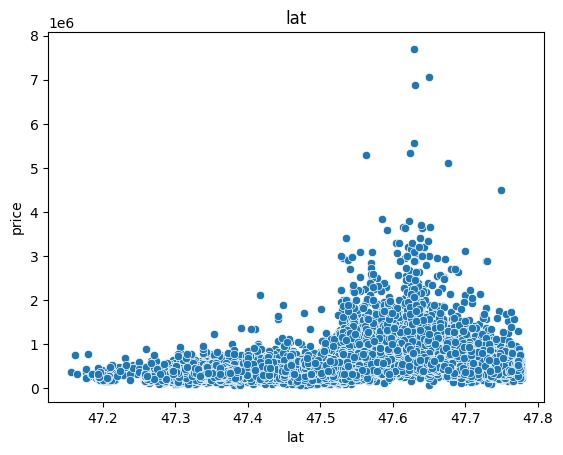

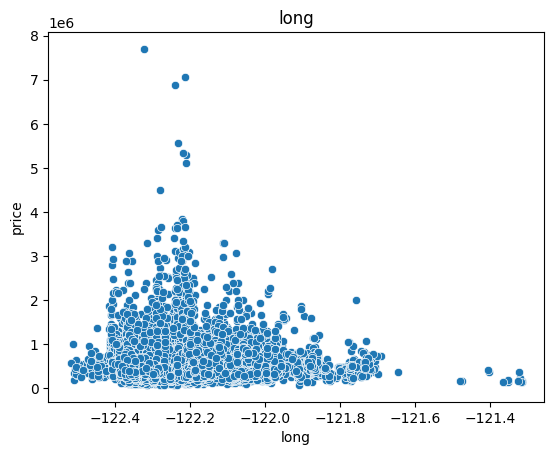

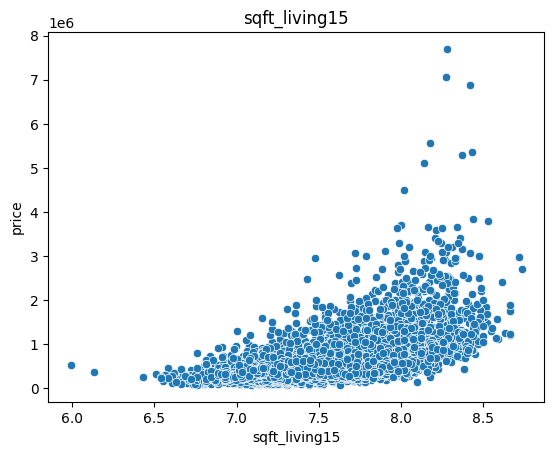

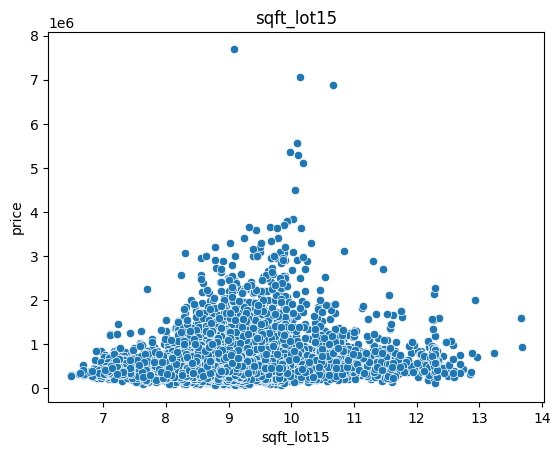

In [18]:
for col in num_columns:
  sns.scatterplot(y=df['price'], x=df[col])
  plt.title(col)
  plt.show()

##feature engeneering

In [19]:
df['sqf']=df['sqft_above']+df['sqft_basement']

In [20]:
df['price'].corr(df['sqf'])

np.float64(0.2831004137286296)

In [21]:
df['yr_built']

,yr_built
0,1955
1,1933
2,1987
3,1995
4,1963
...,...
15030,2014
15031,2009
15032,2009
15033,2014


In [22]:
df['yr_built']=pd.to_datetime(df['yr_built'],format='%Y').dt.year

In [23]:
df['howold']=df['year']-df['yr_built']

In [24]:
df['yr_renovated'].value_counts()

,count
yr_renovated,
0,14404
2014,71
2013,28
2003,25
2000,25
...,...
1950,1
1946,1
1940,1


In [25]:
df['ever_renovated']=df['yr_renovated'].apply(lambda x: 1 if x>0 else 0)

In [26]:
df['BathroomsPerSF']=df['bathrooms']/df['sqf']

In [27]:
df['bedroomPerSF']=df['bedrooms']/df['sqf']

##Training

In [28]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year', 'month', 'day', 'Price_log',
       'sqf', 'howold', 'ever_renovated', 'BathroomsPerSF', 'bedroomPerSF'],
      dtype='object')

In [29]:
features=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'year',
       'sqf', 'howold', 'ever_renovated', 'BathroomsPerSF', 'bedroomPerSF']

In [30]:
target=['Price_log']

In [31]:
X=df[features]
y=df[target]

In [32]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12028, 24) (3007, 24) (12028, 1) (3007, 1)


In [33]:
from scipy.stats import randint as sp_randint, uniform as sp_uniform
param_dist = {
    'n_estimators':        sp_randint(50, 500),
    'num_leaves':          sp_randint(20, 150),
    'max_depth':           sp_randint(3, 12),
    'learning_rate':       sp_uniform(0.01, 0.29),
    'subsample':           sp_uniform(0.5, 0.5),
    'colsample_bytree':    sp_uniform(0.5, 0.5),
    'reg_alpha':           sp_uniform(0, 1),
    'reg_lambda':          sp_uniform(0, 1)}

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import RandomizedSearchCV

model=LGBMRegressor()
random_search=RandomizedSearchCV(model, param_distributions=param_dist,cv=5, n_iter=50,scoring='neg_root_mean_squared_error')
random_search.fit(X_train, y_train)

print("Best RMSLE:", random_search.best_score_)
print("Best params:", random_search.best_params_)

In [35]:
best_model=random_search.best_estimator_
y_pred=best_model.predict(X_test)
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

0.026505917078163556

In [46]:
!unzip /content/kaggle-kakr-housing-data.zip

Archive:  /content/kaggle-kakr-housing-data.zip
  inflating: data/sample_submission.csv  
  inflating: data/test.csv           
  inflating: data/train.csv          


In [47]:
test_df=pd.read_csv('/content/data/test.csv')

In [48]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             6468 non-null   int64  
 1   date           6468 non-null   object 
 2   bedrooms       6468 non-null   int64  
 3   bathrooms      6468 non-null   float64
 4   sqft_living    6468 non-null   int64  
 5   sqft_lot       6468 non-null   int64  
 6   floors         6468 non-null   float64
 7   waterfront     6468 non-null   int64  
 8   view           6468 non-null   int64  
 9   condition      6468 non-null   int64  
 10  grade          6468 non-null   int64  
 11  sqft_above     6468 non-null   int64  
 12  sqft_basement  6468 non-null   int64  
 13  yr_built       6468 non-null   int64  
 14  yr_renovated   6468 non-null   int64  
 15  zipcode        6468 non-null   int64  
 16  lat            6468 non-null   float64
 17  long           6468 non-null   float64
 18  sqft_liv

In [50]:

test_df['datetime']=pd.to_datetime(test_df['date'])
test_df['year']=test_df['datetime'].dt.year
test_df['month']=test_df['datetime'].dt.month
test_df['day']=test_df['datetime'].dt.day
test_df['sqft_living'] = np.log1p(test_df['sqft_living'])
test_df['sqft_above']  = np.log1p(test_df['sqft_above'])
test_df['sqft_basement'] = np.log1p(test_df['sqft_basement'])
test_df['sqft_living15'] = np.log1p(test_df['sqft_living15'])
test_df['sqft_lot15']    = np.log1p(test_df['sqft_lot15'])
test_df['sqf']=test_df['sqft_above']+test_df['sqft_basement']
test_df['yr_built']=pd.to_datetime(test_df['yr_built'],format='%Y').dt.year
test_df['howold']=test_df['year']-test_df['yr_built']
test_df['ever_renovated']=test_df['yr_renovated'].apply(lambda x: 1 if x>0 else 0)
test_df['BathroomsPerSF']=test_df['bathrooms']/test_df['sqf']

In [51]:
test_df['bedroomPerSF']=test_df['bedrooms']/test_df['sqf']

In [52]:
X1=test_df[features]
y_pred1=best_model.predict(X1)
y_pred1

array([13.16622504, 13.09407893, 14.17336099, ..., 13.08227563,
       12.6220386 , 13.04568084])

In [53]:
y_pred_result = np.expm1(y_pred1)

In [56]:
submission = pd.DataFrame({
    'id':    test_df['id'],
    'price': y_pred_result
})


submission.to_csv('submission_result1.csv', index=False)

In [57]:
submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6468 entries, 0 to 6467
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      6468 non-null   int64  
 1   price   6468 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 101.2 KB


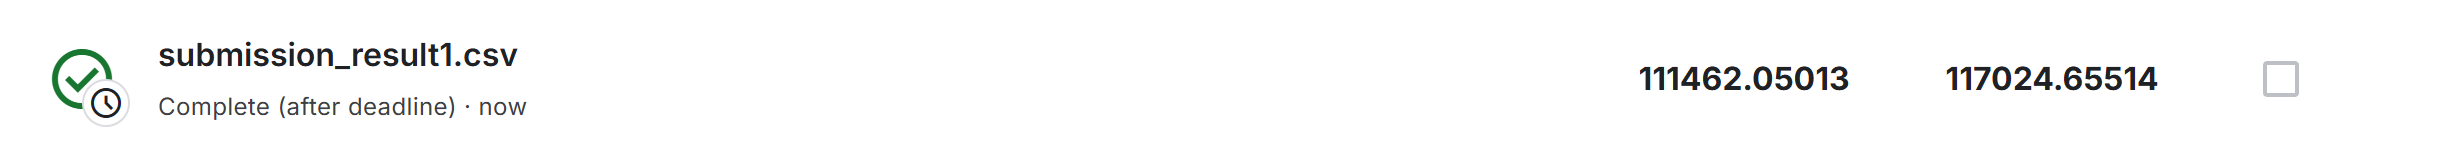

##EDA 및 전처리

train.csv 불러와 결측치 확인 및 date 컬럼을 날짜형으로 변환한 뒤 연도(year) 추출

SalePrice 분포 확인 후 np.log1p로 로그 변환하여 꼬리 분포 완화

##피처 엔지니어링

TotalSF = sqft_above + sqft_basement (총 거주 면적)

HouseAge = year – yr_built (건축 연수), EverRenovated = (yr_renovated>0) (리모델링 여부)

BathroomsPerSF, BedroomsPerSF 등 면적 대비 변수 비율 추가

##데이터 분할

train_test_split으로 학습/검증 데이터 분리 (80/20)

##하이퍼파라미터 튜닝

LGBMRegressor에 대해 RandomizedSearchCV (100회, 5‑fold CV) 실행

평가 지표는 neg_root_mean_squared_error (로그 변환된 타깃 기준)

##모델 학습 및 예측

최적 파라미터로 전체 학습 데이터(Price_log) 재학습

테스트 예측값(y_pred_log)에 np.expm1 적용해 원래 스케일(price)로 복원